In [7]:
import numpy as np
import pandas as pd
import os

from neuromaps.datasets import fetch_annotation
from neuromaps.parcellate import Parcellater
from scipy.stats import pearsonr

import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
base_path = os.path.dirname(os.getcwd())

dk_mni = f'{base_path}/parcellations/atlas-desikankilliany_space-MNI_res-1mm.nii.gz'
parcellater_mni = Parcellater(dk_mni, 'MNI152')

In [4]:
ucbj = fetch_annotation(source='finnema2016')
parcellated_ucbj = parcellater_mni.fit_transform(ucbj, space='MNI152', ignore_background_data=True)

In [5]:
svt1 = f'{base_path}/test_subject/mrtm2_sm6/bp.nii.gz'
parcellated_svt1 = parcellater_mni.fit_transform(svt1, space='MNI152', ignore_background_data=True)

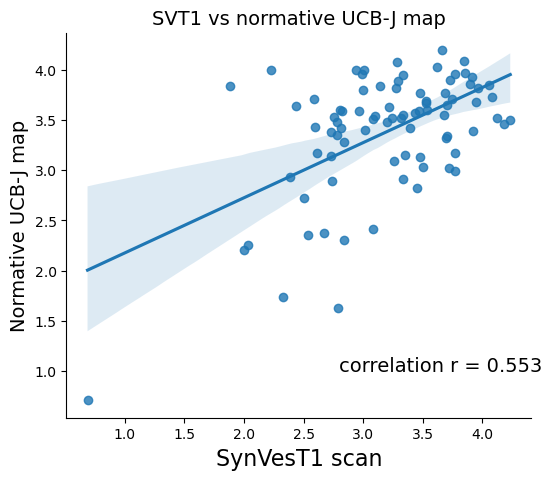

In [20]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.despine()

df = pd.DataFrame({'SynVesT1':parcellated_svt1[0], 'UCB-J':parcellated_ucbj[0] })
sns.regplot(df, x='SynVesT1', y='UCB-J'); 

rho = np.round(pearsonr(parcellated_svt1[0], parcellated_ucbj[0])[0], 3)
text = f'correlation r = {rho}';
ax.annotate(text, xy=(2.8,1), size=14)
plt.title('SVT1 vs normative UCB-J map', size=14)
ax.set_xlabel('SynVesT1 scan', size=16)
ax.set_ylabel('Normative UCB-J map', size=14);